# Polynomial Regression: Ice Cream Sales Prediction


Polynomial regression is a regression method used when the relationship between input variable (x) and output variable (y) is curved rather than straight.

* Linear regression model:
  $( y = a + bx )$

* Polynomial regression model:
  $( y = a + bx + cx^2 + dx^3 + \dots )$

The additional powers of $x$ (such as $x^2, x^3$) allow the model to fit curved patterns in data.
$
In simple terms, polynomial regression extends linear regression to model non-linear relationships.


### 1. Import Libraries and Load Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/SagarChhabriya/data-science/refs/heads/main/datasets/03-polynomial-regression/Ice_cream_selling_data.csv")
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


### 2. Data Exploration (+EDA) and Preprocessing: Minimal

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [4]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [5]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

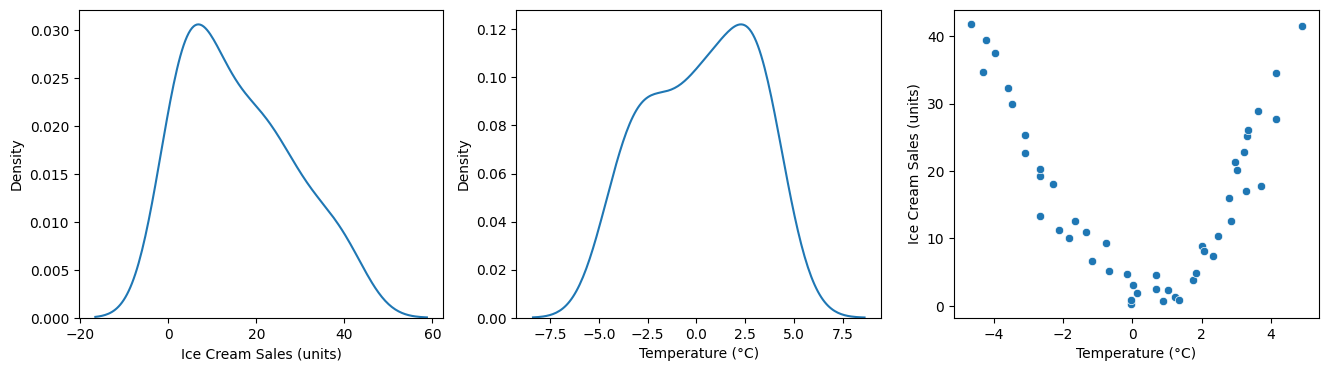

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))


sns.kdeplot(data=df, x='Ice Cream Sales (units)', ax=ax1)
sns.kdeplot(data=df, x="Temperature (°C)", ax=ax2)
sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)', ax=ax3)

### 3. Train Test Split

In [7]:
X=df[['Temperature (°C)']]
y= df['Ice Cream Sales (units)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Model Training

In [11]:
reg = LinearRegression()

reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 5. Prediction and Evaluation

In [12]:
y_pred = reg.predict(X_test)

In [13]:
print(r2_score(y_test, y_pred))

-0.5751270190188227


Text(0, 0.5, 'Ice Cream Sales')

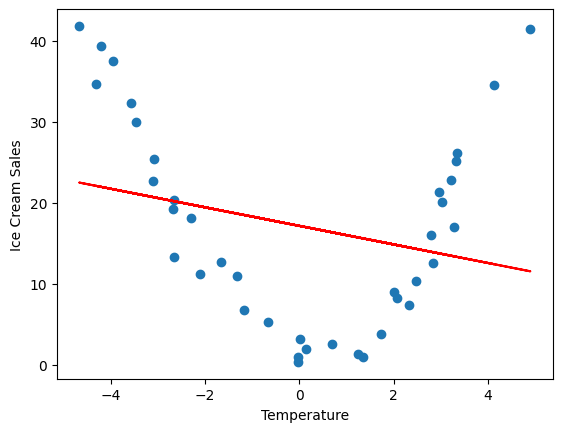

In [14]:
plt.plot(X_train, reg.predict(X_train), color="red") # Pattern learned by model: Red Line
plt.scatter(X_train, y_train)   # Scatter plot of training data
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")

### Repeat from Step 4: Apply Polynomial Feature and Train the model

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [16]:
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
y_pred = poly_reg.predict(X_test_poly)

print(r2_score(y_test, y_pred))

0.843055137193884


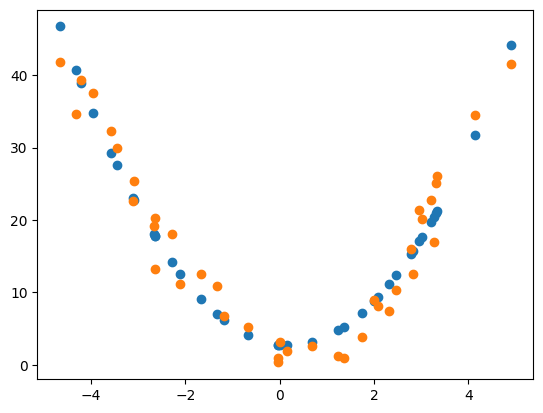

In [22]:
# plt.plot(X_train, poly_reg.predict(X_train_poly), color="red")
# sns.scatterplot(x=X_train, y=poly_reg.predict(X_train_poly))

# The non-linear pattern learned by the model: Blue
plt.scatter(X_train, poly_reg.predict(X_train_poly))

# Scatter plot of training data: Orange
plt.scatter(X_train, y_train)

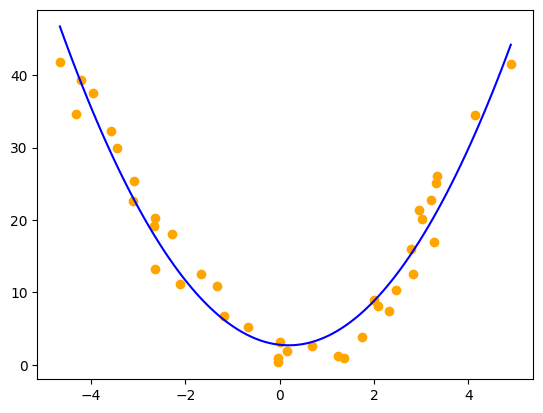

In [24]:
# Create smooth X values
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Plot learned curve
plt.plot(X_range, poly_reg.predict(X_range_poly), color="blue")

# Plot training data
plt.scatter(X_train, y_train, color="orange")


In [25]:
poly_reg.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [27]:
poly_reg.intercept_

2.7683058295738583

#### End of Notebook